# 問題設定
15人ぐらいで飲み会をしたときに、参加者だけで誕生月１～１２月を網羅していることが話題にあがった。  
これはすごいことだ！と盛り上がったが、どれくらいすごいことかわからない。  

客観的にこのすごさを知りたい。

## 期待値・標準偏差

In [1]:
import numpy as np

n = 12 # 揃えたい誕生月の数
# i...既に網羅している月の数
p_ = lambda i: (n-i)/n                 # 幾何分布の確率(まだ居ない誕生月の人を雇う確率)
e_ = lambda i: 1 / p_(i)             # 幾何分布の期待値(まだ居ない誕生月の人を雇うまでにかかる人数の期待値)
v2_ = lambda i: (1-p_(i))/(p_(i)**2) # 幾何分布の分散(まだ居ない誕生月の人を雇うまでにかかる人数の分散)
v_ = lambda i: np.sqrt(v2_(i))       # 分散から平方根

sum_target_list = list(range(0,n))
sum_fn = lambda fn: sum([fn(i) for i in sum_target_list])

print('期待値',sum_fn(e_), '　標準偏差',sum_fn(v_))

期待値 37.23852813852814 　標準偏差 29.571261084405688


## シミュレーション
一様分布から1～12の値を取り出す。  
全種類を取り出すまでにかかった回数を求める。  

これを100000回繰り返し、回数の度数分布を確かめる。  

min: 12 max 164


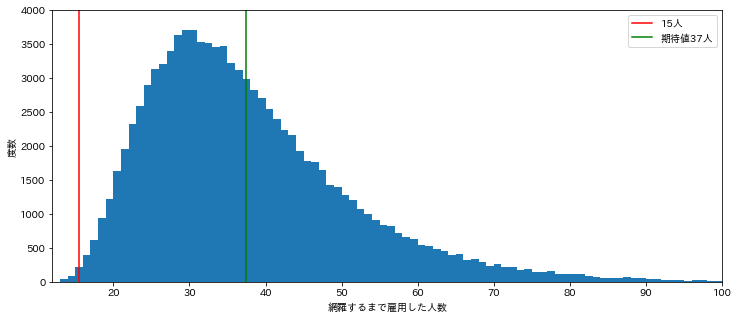

In [4]:
def simulation(n):
    loop_count = 0
    collect = {}

    while True:
        loop_count += 1
        target = np.random.randint(n) + 1
        collect[target] = 1
        
        if len(collect) == n:
            break
    
    return loop_count


result_list = []
for i in range(100000):
    result = simulation(n)
    result_list.append(result)
    
min_ = min(result_list)
max_ = max(result_list)
print('min:', min_, 'max', max_)

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))
ax.hist(result_list, bins=max_-min_)
ax.plot([15.5,15.5],[0,10000], color='r', label='15人')
ax.plot([37.5,37.5],[0,10000], color='g', label='期待値37人')
ax.set_xlim(min_,100)
ax.set_ylim(0,4000)
ax.set_xlabel('網羅するまで雇用した人数')
ax.set_ylabel('度数')
plt.legend()
plt.show()

15人以下で全ての誕生月がそろった回数, 確率

In [5]:
count = 0
for result in result_list:
    if result <= 15:
        count += 1
print('カウント:', count, '確率:', count/len(result_list))

カウント: 358 確率: 0.00358
